<a href="https://colab.research.google.com/github/Shahzad-kml/ML1/blob/main/Transfer_Learning_of_EMNIST_using_CNN_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from emnist import extract_training_samples, extract_test_samples
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Load EMNIST ByClass dataset
x_train, y_train = extract_training_samples('byclass')
x_test, y_test = extract_test_samples('byclass')

In [ ]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert class labels to one-hot encoded vectors
num_classes = 62  # EMNIST ByClass dataset has 62 classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Load pre-trained model on MNIST
mnist_model = keras.models.load_model('/content/drive/MyDrive/Datasets/CCN_Mnist_dataset.h5')

# Remove the last layer of the model (softmax layer for MNIST classification)
mnist_model.pop()

# Freeze the weights of all the layers except the last one
for layer in mnist_model.layers[:-1]:
    layer.trainable = False

# Add a new softmax layer for EMNIST classification
new_layer = Dense(num_classes, activation='softmax')
mnist_model.add(new_layer)

# Compile the model with the new softmax layer
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam', metrics=['accuracy'])

# Train the model on EMNIST dataset
history = mnist_model.fit(x_train, y_train, batch_size=128, epochs=10,
                          validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
5453/5453 [==============================] - 36s 6ms/step - loss: 0.7585 - accuracy: 0.7633 - val_loss: 0.6171 - val_accuracy: 0.7953
Epoch 2/10
5453/5453 [==============================] - 31s 6ms/step - loss: 0.5978 - accuracy: 0.8000 - val_loss: 0.5858 - val_accuracy: 0.8034
Epoch 3/10
5453/5453 [==============================] - 31s 6ms/step - loss: 0.5781 - accuracy: 0.8051 - val_loss: 0.5787 - val_accuracy: 0.8036
Epoch 4/10
5453/5453 [==============================] - 33s 6ms/step - loss: 0.5679 - accuracy: 0.8077 - val_loss: 0.5713 - val_accuracy: 0.8075
Epoch 5/10
5453/5453 [==============================] - 30s 5ms/step - loss: 0.5617 - accuracy: 0.8093 - val_loss: 0.5653 - val_accuracy: 0.8100
Epoch 6/10
5453/5453 [==============================] - 32s 6ms/step - loss: 0.5573 - accuracy: 0.8103 - val_loss: 0.5595 - val_accuracy: 0.8108
Epoch 7/10
5453/5453 [==============================] - 30s 6ms/step - loss: 0.5536 - accuracy: 0.8115 - val_loss: 0.5622 - val_ac

In [ ]:
# Evaluate the model on EMNIST test set
score = mnist_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5555842518806458
Test accuracy: 0.8130894303321838


In [ ]:
import numpy as np

# Predict the labels of the test data
y_pred = mnist_model.predict(x_test)

# Convert the predictions from categorical format to integer format
y_pred_int = np.argmax(y_pred, axis=1)

# Print the first 10 predictions and their corresponding true labels
for i in range(10):
    print('Prediction:', y_pred_int[i], 'True Label:', np.argmax(y_test[i]))


3636/3636 [==============================] - 8s 2ms/step
Prediction: 1 True Label: 18
Prediction: 42 True Label: 36
Prediction: 0 True Label: 0
Prediction: 3 True Label: 3
Prediction: 33 True Label: 33
Prediction: 30 True Label: 30
Prediction: 24 True Label: 24
Prediction: 40 True Label: 40
Prediction: 5 True Label: 5
Prediction: 8 True Label: 8


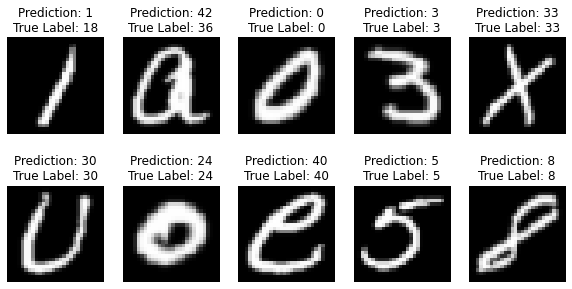

In [ ]:
import matplotlib.pyplot as plt

# Display the first 10 images in the test set with their predicted and true labels
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.flatten()
for i in range(10):
    img = x_test[i].reshape(28, 28)
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title('Prediction: {}\nTrue Label: {}'.format(y_pred_int[i], np.argmax(y_test[i])))
    axs[i].axis('off')
plt.show()

In [ ]:
mnist_model.save('/content/drive/MyDrive/Datasets/transfer_learning_task1_EMNIST.h5')
mnist_model.save_weights('/content/drive/MyDrive/Datasets/task_1_EMNIST_weights.h5')

In [ ]:
j